In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ps = load('/Users/dai/Downloads/sample_sents_prob.npy')

In [3]:
ps.shape

(50, 40, 50257)

In [20]:
inds = load('/Users/dai/Downloads/sample_sents_idxs.npy')

In [31]:
exec(open('./external/gpt-2/src/encoder.py', 'r').read())

In [35]:
enc = get_encoder('117M')

In [4]:
ent = - ps * np.log2(ps)

In [7]:
ent = ent.sum(-1)

In [9]:
ent.shape

(50, 40)

(array([132.,  29.,  19.,  15.,  24.,  25.,  25.,  23.,  48.,  43.,  31.,
         46.,  47.,  59.,  61.,  66.,  62.,  65.,  63.,  65.,  68.,  63.,
         69.,  86.,  67.,  80.,  71.,  71.,  68.,  73.,  67.,  52.,  39.,
         92.,  32.,  20.,  14.,  11.,   6.,   3.]),
 array([4.32691879e-05, 3.01695714e-01, 6.03348158e-01, 9.05000603e-01,
        1.20665305e+00, 1.50830549e+00, 1.80995794e+00, 2.11161038e+00,
        2.41326283e+00, 2.71491527e+00, 3.01656771e+00, 3.31822016e+00,
        3.61987260e+00, 3.92152505e+00, 4.22317749e+00, 4.52482994e+00,
        4.82648238e+00, 5.12813483e+00, 5.42978727e+00, 5.73143971e+00,
        6.03309216e+00, 6.33474460e+00, 6.63639705e+00, 6.93804949e+00,
        7.23970194e+00, 7.54135438e+00, 7.84300683e+00, 8.14465927e+00,
        8.44631172e+00, 8.74796416e+00, 9.04961660e+00, 9.35126905e+00,
        9.65292149e+00, 9.95457394e+00, 1.02562264e+01, 1.05578788e+01,
        1.08595313e+01, 1.11611837e+01, 1.14628362e+01, 1.17644886e+01,
      

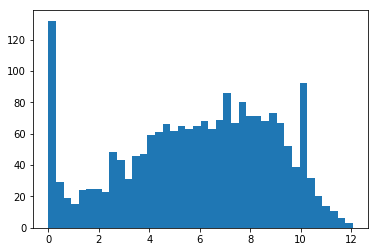

In [60]:
hist(ent.flatten(), bins=40)

5
<|endoftext|>Overprotective breast cup is high calorie but less greasy than most soft cotton cups now on sale! Nobody has rated this review yet.

Rated 5 out of 5 by Anonymous from Best Piece
48
<|endoftext|>Zika Outbreak Outbreak: Prison Architect - First Contact Outbreak: Remnants of a Big Genesis Outbreak: The New Nightmare Outbreak: The Nightmare Chronicles Outcast - Second Contact Outcast 1.1 OutDrive


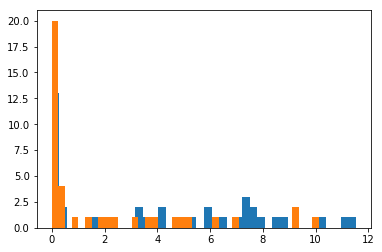

In [47]:
for i, en in enumerate(ent):
    if (en < 1).sum() > 10:
        print(i)
        hist(en, bins=40)
        print(enc.decode(inds[i]))

In [36]:
# Many low entropy steps
enc.decode(inds[5])

'<|endoftext|>Overprotective breast cup is high calorie but less greasy than most soft cotton cups now on sale! Nobody has rated this review yet.\n\nRated 5 out of 5 by Anonymous from Best Piece'

In [45]:
enc.decode(inds[11])

"<|endoftext|>A pregnant family member of Mr Andre Vide.\n\n\nThe MP's wife Cathy and two children were told they were in the buyout for 10 days in January when Turn Error Auto Team seats a rubbish"

In [50]:
hist(ent[21], bins=40)

(array([5., 1., 3., 1., 1., 1., 0., 1., 1., 0., 3., 1., 2., 0., 1., 1., 1.,
        0., 0., 0., 2., 0., 2., 2., 0., 0., 1., 5., 2., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 1.]),
 array([4.77031077e-03, 2.57504118e-01, 5.10237925e-01, 7.62971732e-01,
        1.01570554e+00, 1.26843935e+00, 1.52117315e+00, 1.77390696e+00,
        2.02664077e+00, 2.27937457e+00, 2.53210838e+00, 2.78484219e+00,
        3.03757599e+00, 3.29030980e+00, 3.54304361e+00, 3.79577742e+00,
        4.04851122e+00, 4.30124503e+00, 4.55397884e+00, 4.80671264e+00,
        5.05944645e+00, 5.31218026e+00, 5.56491406e+00, 5.81764787e+00,
        6.07038168e+00, 6.32311549e+00, 6.57584929e+00, 6.82858310e+00,
        7.08131691e+00, 7.33405071e+00, 7.58678452e+00, 7.83951833e+00,
        8.09225214e+00, 8.34498594e+00, 8.59771975e+00, 8.85045356e+00,
        9.10318736e+00, 9.35592117e+00, 9.60865498e+00, 9.86138878e+00,
        1.01141226e+01]),
 <a list of 40 Patch objects>)

In [51]:
enc.decode(inds[21])

'<|endoftext|>Graduate School of Engineering and Mathematical Sciences Cambridge University (1918–1955) Massachusetts Institute of Technology Cambridge, Massachusetts, United States Stanford University Applied Physics Institute University of Toronto University of British Columbia'

In [55]:
ent.mean(), ent.var(), np.median(ent)

(5.936643396727782, 9.103488602635279, 6.261702937014634)